In [ ]:
import os

In [ ]:
os.listdir("D:\\deep_learning\\Alzheimer_s Dataset\\train")

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [ ]:
os.listdir("D:\\deep_learning\\Alzheimer_s Dataset\\test")

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [ ]:
train_dir="D:/deep_learning/Alzheimer_s Dataset/train/"

In [ ]:
test_dir="D:/deep_learning/Alzheimer_s Dataset/test/"

In [ ]:
os.listdir(train_dir)
train_mild=train_dir+"MildDemented/"
train_moderate=train_dir+"ModerateDemented/"
train_nonmod=train_dir+"NonDemented/"
train_verymild=train_dir+"VeryMildDemented/"

In [ ]:
#mild pic
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
print(len(os.listdir(train_mild)))
rand_norm=np.random.randint(0,len(os.listdir(train_mild)))
mild_pic=os.listdir(train_mild)[rand_norm]
print("mild picture title:",mild_pic)
mild_pic_address=train_mild+mild_pic

717
mild picture title: mildDem634.jpg


In [ ]:
#moderate image
rand_norm=np.random.randint(0,len(os.listdir(train_moderate)))
moderate_pic=os.listdir(train_moderate)[rand_norm]
print("mild picture title:",moderate_pic)

mild picture title: moderateDem37.jpg


In [ ]:
#very mild
rand_norm=np.random.randint(0,len(os.listdir(train_verymild)))
verymild_pic=os.listdir(train_verymild)[rand_norm]
print("mild picture title:",verymild_pic)

mild picture title: verymildDem874.jpg


In [ ]:
#non moderate
rand_norm=np.random.randint(0,len(os.listdir(train_nonmod)))
nonmod_pic=os.listdir(train_nonmod)[rand_norm]
print("mild picture title:",nonmod_pic)

mild picture title: nonDem384.jpg


In [ ]:
#assigning address
moderate_add=train_moderate+moderate_pic

In [ ]:
verymild_add=train_verymild+verymild_pic

In [ ]:
nonmod_add=train_nonmod+nonmod_pic

Text(0.5, 1.0, 'milddemented')

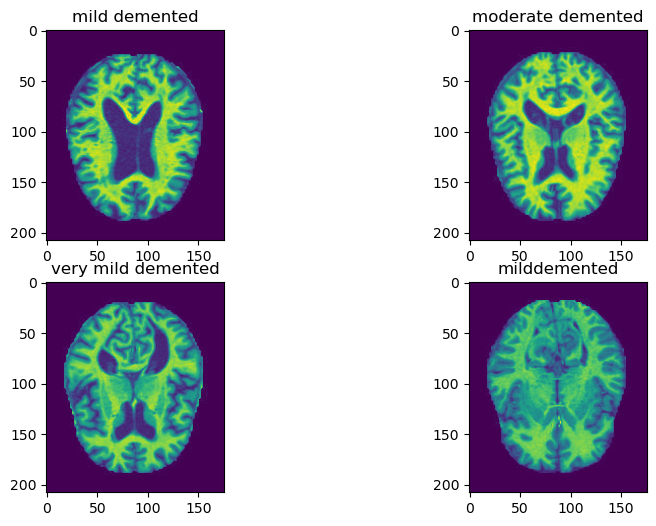

In [ ]:
#plt these images
#load the images
mild_load=Image.open(mild_pic_address)
moderate_load=Image.open(moderate_add)
verymild_load=Image.open(verymild_add)
nonmod_load=Image.open(nonmod_add)
f=plt.figure(figsize=(10,6))
a1=f.add_subplot(2,2,1)
img_plot=plt.imshow(mild_load)
a1.set_title("mild demented")
a2=f.add_subplot(2,2,2)
img_plot=plt.imshow(moderate_load)
a2.set_title("moderate demented")
a3=f.add_subplot(2,2,3)
img_plot=plt.imshow(verymild_load)
a3.set_title("very mild demented")
a4=f.add_subplot(2,2,4)
img_plot=plt.imshow(nonmod_load)
a4.set_title("milddemented")

In [ ]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.13.0
    Uninstalling tensorboard-2.13.0:
      Successfully uninstalled tensorboard-2.13.0
  Attempting uninstall: tensorflow-intel
    Found existing installation: tensorflow-intel 2.13.0
    Uninstalling ten

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from sklearn.model_selection import train_test_split

train_dir = "D:/deep_learning/Alzheimer_s Dataset/train/"
train_generator = ImageDataGenerator(
    rescale=1/255,
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

train_data = train_generator.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=4,
    shuffle=False
)

# Extract data and labels
data, labels = next(train_data)

# Split data and labels
train_data, val_data, train_labels, val_labels = train_test_split(
    data,
    labels,
    test_size=0.2,
    random_state=42
)

# Create separate generators for training and validation
train_generator = ImageDataGenerator(
    rescale=1/255,
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

train_generator.fit(train_data)
train_generator = train_generator.flow(train_data, train_labels, batch_size=4, shuffle=True)

val_generator = ImageDataGenerator(rescale=1/255)
val_generator.fit(val_data)
val_generator = val_generator.flow(val_data, val_labels, batch_size=4, shuffle=False)


Found 5121 images belonging to 4 classes.


In [ ]:
test_generator=ImageDataGenerator(rescale=1/255.0)
test_generator=test_generator.flow_from_directory(test_dir,target_size=(224,224,3),batch_size=12)

Found 1279 images belonging to 4 classes.


In [ ]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf

print("tensorflow version {}".format(tf.__version__))


tensorflow version 2.12.0


In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D

In [ ]:
xception=Xception(input_shape=[224,224,3],weights="imagenet",include_top=False)

In [ ]:
xception.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [ ]:
pip install visualkeras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
for layers in xception.layers[:50]:
    layers.trainable=False

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
x = Flatten()(xception.output)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
prediction = Dense(4, activation='softmax')(x)
# create a model object
model = Model(inputs=xception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [ ]:
pip install BatchNormalization

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement BatchNormalization (from versions: none)
ERROR: No matching distribution found for BatchNormalization


In [ ]:
from tensorflow.keras.layers import BatchNormalization

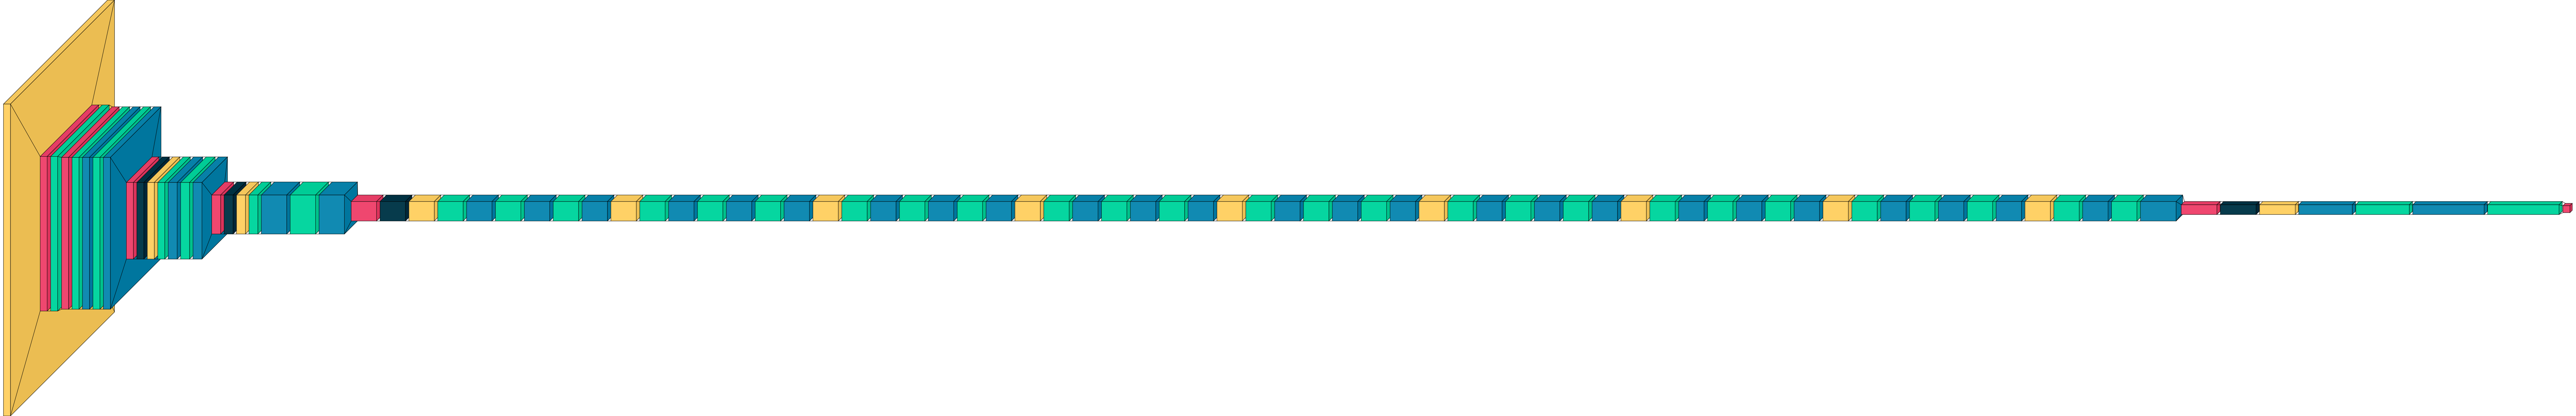

In [ ]:
import visualkeras
visualkeras.layered_view(model, type_ignore=[ ZeroPadding2D,BatchNormalization,Flatten,Dropout])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
history = model.fit_generator(train_generator,validation_data = val_generator,epochs = 20, verbose = 1)

C:\Users\admin\AppData\Local\Temp\ipykernel_5308\3998390205.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,validation_data = val_generator,epochs = 20, verbose = 1)


Epoch 1/20
1/1 [==============================] - 20s 20s/step - loss: 1.1204 - acc: 0.6667 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 5.1497e-05 - val_acc: 1.0000
Epoch 3/20
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 2.3842e-05 - val_acc: 1.0000
Epoch 4/20
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 1.9193e-05 - val_acc: 1.0000
Epoch 5/20
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 1.3471e-05 - val_acc: 1.0000
Epoch 6/20
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 5.9604e-06 - val_acc: 1.0000
Epoch 7/20
1/1 [==============================] - 2s 2s/step - loss: 0.0000e+00 - acc: 1.0000 - val_loss: 2.7418e-06 - val_acc: 1.0000
Epoch 8/20
1/1 [==============================] - 2s 2s/step 

In [ ]:
accuracy=history.history['acc']
loss=history.history['loss']
val_accuracy=history.history['val_acc']
val_loss=history.history['val_loss']

In [ ]:
epochs = range(len(accuracy))
epochs

range(0, 20)

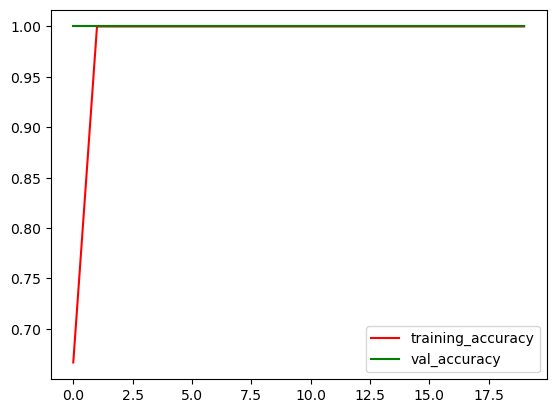

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs,accuracy,'r',label='training_accuracy')
plt.plot(epochs,val_accuracy,'g',label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
##2)build an CNN model on the chosen dataset

In [ ]:
# !pip install tensorflow

import tensorflow as tf
print(tf.__version__)
# %tensorflow_version 2.x

2.12.0


In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [ ]:
from keras.datasets import cifar10
from keras.utils import np_utils
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

In [ ]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 10
data_augmentation = False

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [ ]:
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:

#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
history = None  # For recording the history of trainning process.
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                    batch_size=batch_size),
                                    epochs=epochs,
                                    validation_data=(x_test, y_test),
                                    workers=4)


Not using data augmentation.
Epoch 1/10
1563/1563 [==============================] - 243s 155ms/step - loss: 1.8168 - accuracy: 0.3362 - val_loss: 1.5306 - val_accuracy: 0.4557
Epoch 2/10
1563/1563 [==============================] - 232s 148ms/step - loss: 1.5015 - accuracy: 0.4578 - val_loss: 1.3331 - val_accuracy: 0.5251
Epoch 3/10
1563/1563 [==============================] - 236s 151ms/step - loss: 1.3550 - accuracy: 0.5148 - val_loss: 1.2237 - val_accuracy: 0.5657
Epoch 4/10
1563/1563 [==============================] - 262s 168ms/step - loss: 1.2562 - accuracy: 0.5535 - val_loss: 1.1338 - val_accuracy: 0.5994
Epoch 5/10
1563/1563 [==============================] - 238s 152ms/step - loss: 1.1791 - accuracy: 0.5809 - val_loss: 1.1037 - val_accuracy: 0.6120
Epoch 6/10
1563/1563 [==============================] - 229s 147ms/step - loss: 1.1119 - accuracy: 0.6088 - val_loss: 1.0556 - val_accuracy: 0.6270
Epoch 7/10
1563/1563 [==============================] - 231s 148ms/step - loss: 1.0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


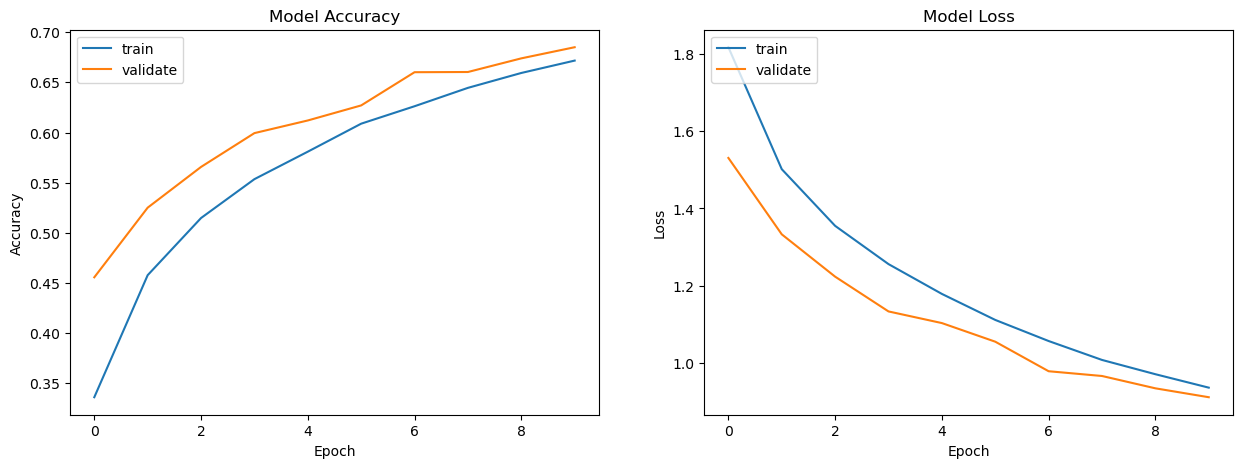

In [ ]:

def plotmodelhistory(history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'])
    axs[0].plot(history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)


In [ ]:
#3)chosen timeseries dataset ,forecast the trend using LSTM and GRU and compare the performance of these two models
%cd D:\deep_learning

D:\deep_learning


In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

ModuleNotFoundError: No module named 'scalecast'

In [ ]:
df=pd.read_csv("AirPassengers.csv",parse_dates=["Month"])

In [ ]:
pip install scalecast --upgrade

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 890.0/890.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 44.0/44.0 kB 432.8 kB/s eta 0:00:00
     ------------------------------------ 216.2/216.2 kB 660.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.0/1.0 MB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 1.3 MB/s eta 0:00:00
     -------------------------------------- 101.0/101.0 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 47.0/47.0 kB 593.5 kB/s eta 0:00:00
     -------------------------------------- 569.7/569.7 kB 1.6 MB/s eta 0:00:00
     -------------------------------------- 988.3/988.3 kB 1.3 MB/s eta 0:00:00
  

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2022.7.0 requires dask==2022.7.0, but you have dask 2023.7.0 which is incompatible.


In [ ]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from scalecast.Forecaster import Forecaster

In [ ]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
#exploratory data analysis
f = Forecaster(
    y=df['#Passengers'],
   current_dates=df['Month']
 )

In [ ]:
f

Forecaster(
    DateStartActuals=1949-01-01T00:00:00.000000000
    DateEndActuals=1960-12-01T00:00:00.000000000
    Freq=MS
    N_actuals=144
    ForecastLength=0
    Xvars=[]
    TestLength=0
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=mlr
    GridsFile=Grids
)

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


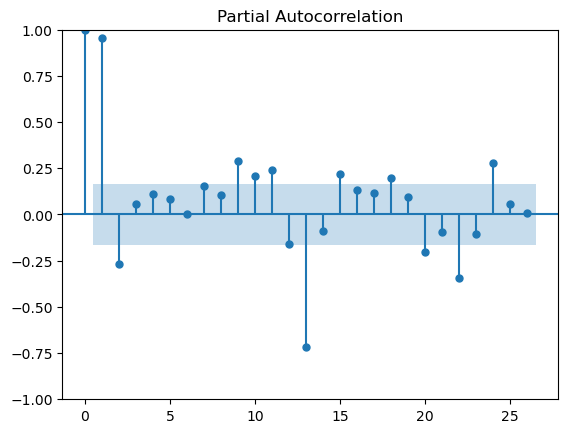

In [ ]:
#pacf plot
f.plot_pacf(lags=26)
plt.show()

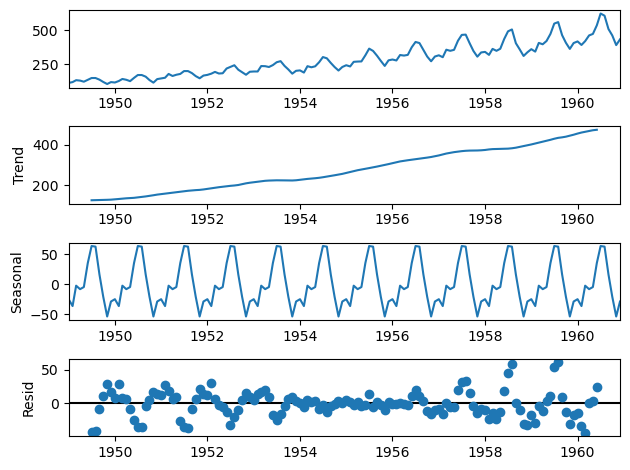

In [ ]:
f.seasonal_decompose().plot()
plt.show()

In [ ]:
stat,pval,_,_,_,_=f.adf_test(full_res=True)

In [ ]:
stat

0.8153688792060423

In [ ]:
pval

0.9918802434376409

In [ ]:
#LSTM forecasting
#specify a test length
#generate future dates
#choose an estimator
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator("lstm")

5/5 [==============================] - 0s 3ms/step


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\scalecast\_utils.py:55: Warning: Confidence intervals not found for lstm_default. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


<Axes: xlabel='Date', ylabel='Values'>

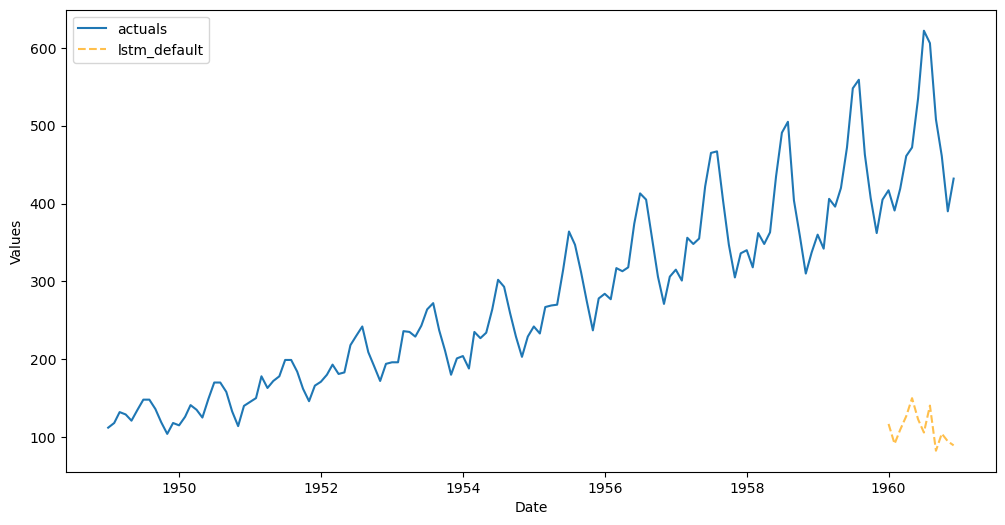

In [ ]:
f.manual_forecast(call_me="lstm_default")
f.plot_test_set(ci=True)

4/4 [==============================] - 4s 14ms/step - loss: 0.3975


4/4 [==============================] - 0s 9ms/step


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\scalecast\_utils.py:55: Warning: Confidence intervals not found for lstm_default. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\scalecast\_utils.py:55: Warning: Confidence intervals not found for lstm_24lags. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


<Axes: xlabel='Date', ylabel='Values'>

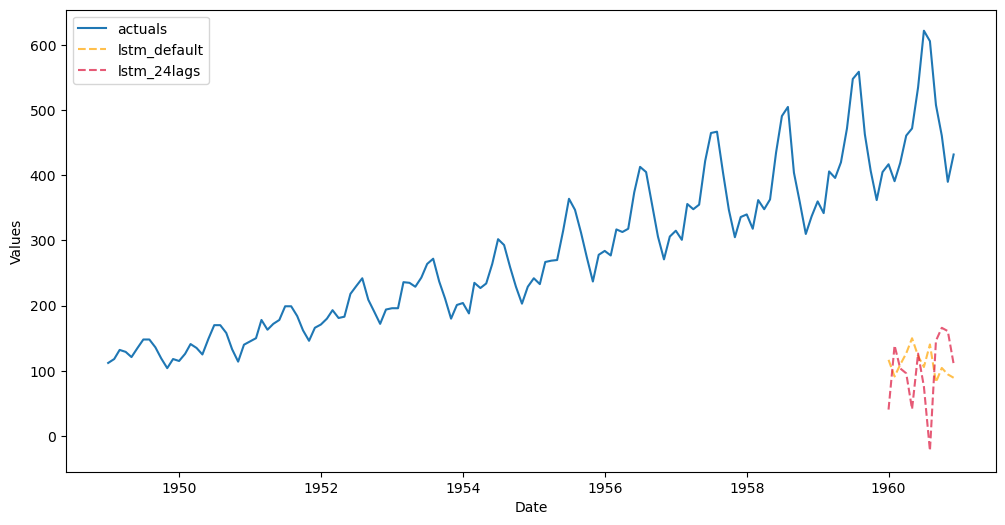

In [ ]:
f.manual_forecast(call_me="lstm_24lags",lags=24)
f.plot_test_set(ci=True)

Epoch 1/5
3/3 [==============================] - 4s 414ms/step - loss: 0.3490 - val_loss: 0.6226
Epoch 2/5
3/3 [==============================] - 0s 39ms/step - loss: 0.3418 - val_loss: 0.6123
Epoch 3/5
3/3 [==============================] - 0s 36ms/step - loss: 0.3345 - val_loss: 0.6018
Epoch 4/5
3/3 [==============================] - 0s 48ms/step - loss: 0.3271 - val_loss: 0.5911
Epoch 5/5
1/1 [==============================] - 1s 652ms/step
Epoch 1/5
3/3 [==============================] - 5s 457ms/step - loss: 0.3379 - val_loss: 0.6365
Epoch 2/5
3/3 [==============================] - 0s 39ms/step - loss: 0.3288 - val_loss: 0.6236
Epoch 3/5
3/3 [==============================] - 0s 37ms/step - loss: 0.3193 - val_loss: 0.6102
Epoch 4/5
3/3 [==============================] - 0s 36ms/step - loss: 0.3094 - val_loss: 0.5961
Epoch 5/5
3/3 [==============================] - 0s 38ms/step - loss: 0.2992 - val_loss: 0.5813


4/4 [==============================] - 0s 6ms/step


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\scalecast\_utils.py:55: Warning: Confidence intervals not found for lstm_default. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\scalecast\_utils.py:55: Warning: Confidence intervals not found for lstm_24lags. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\scalecast\_utils.py:55: Warning: Confidence intervals not found for lstm_24lags_5epochs. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


<Axes: xlabel='Date', ylabel='Values'>

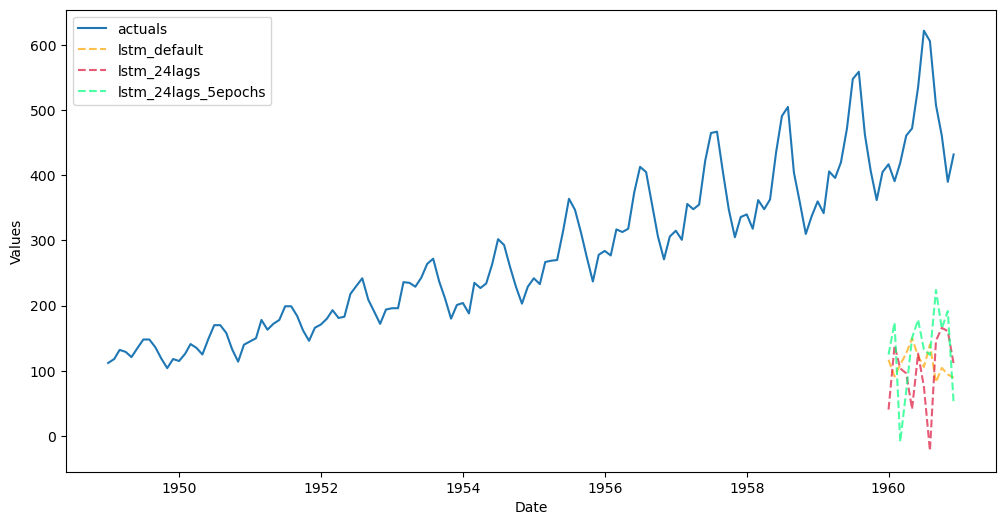

In [ ]:
f.manual_forecast(
    call_me='lstm_24lags_5epochs',
    lags=24,
    epochs=5,
    validation_split=.2,
    shuffle=True,
)
f.plot_test_set(ci=True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(
    call_me="lstm_24lags_earlystop_3layers",
    lags=24,
    epochs=25,
    validation_split=0.2,
    shuffle=True,
    callbacks=EarlyStopping(
    monitor="val_loss",
    patience=5,),
    lstm_layer_sizes=(16,16,16),
    dropout=(0,0,0),

)
f.plot_test_sec(ci=True)

Epoch 1/25
3/3 [==============================] - 14s 1s/step - loss: 0.3499 - val_loss: 0.6184
Epoch 2/25
3/3 [==============================] - 0s 63ms/step - loss: 0.3339 - val_loss: 0.5931
Epoch 3/25
3/3 [==============================] - 0s 64ms/step - loss: 0.3155 - val_loss: 0.5629
Epoch 4/25
3/3 [==============================] - 0s 71ms/step - loss: 0.2927 - val_loss: 0.5246
Epoch 5/25
3/3 [==============================] - 0s 68ms/step - loss: 0.2635 - val_loss: 0.4741
Epoch 6/25
3/3 [==============================] - 0s 63ms/step - loss: 0.2293 - val_loss: 0.4110
Epoch 7/25
3/3 [==============================] - 0s 63ms/step - loss: 0.2047 - val_loss: 0.3518
Epoch 8/25
3/3 [==============================] - 0s 63ms/step - loss: 0.1932 - val_loss: 0.3112
Epoch 9/25
3/3 [==============================] - 0s 63ms/step - loss: 0.1812 - val_loss: 0.2922
Epoch 10/25
3/3 [==============================] - 0s 70ms/step - loss: 0.1642 - val_loss: 0.2915
Epoch 11/25
3/3 [=============

AttributeError: 'Forecaster' object has no attribute 'plot_test_sec'

Epoch 1/15
3/3 [==============================] - 15s 1s/step - loss: 0.3905 - val_loss: 0.5802
Epoch 2/15
3/3 [==============================] - 0s 125ms/step - loss: 0.3329 - val_loss: 0.3819
Epoch 3/15
3/3 [==============================] - 0s 126ms/step - loss: 0.2109 - val_loss: 0.2365
Epoch 4/15
3/3 [==============================] - 0s 125ms/step - loss: 0.1543 - val_loss: 0.1786
Epoch 5/15
3/3 [==============================] - 0s 125ms/step - loss: 0.1010 - val_loss: 0.1697
Epoch 6/15
3/3 [==============================] - 0s 131ms/step - loss: 0.1036 - val_loss: 0.1335
Epoch 7/15
3/3 [==============================] - 0s 124ms/step - loss: 0.0892 - val_loss: 0.1150
Epoch 8/15
3/3 [==============================] - 0s 124ms/step - loss: 0.0784 - val_loss: 0.1151
Epoch 9/15
3/3 [==============================] - 0s 128ms/step - loss: 0.0794 - val_loss: 0.1165
Epoch 10/15
3/3 [==============================] - 0s 124ms/step - loss: 0.0803 - val_loss: 0.1293
Epoch 11/15
3/3 [====

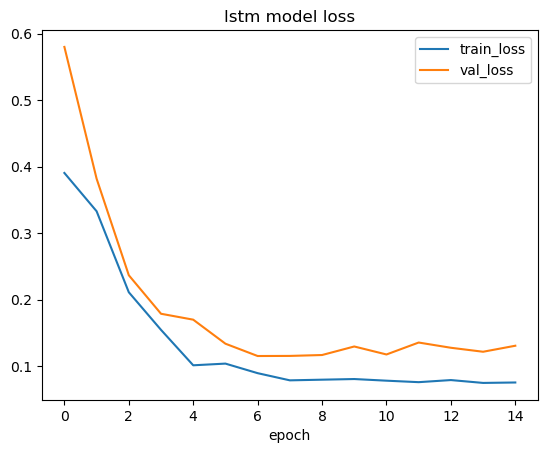

Epoch 1/15
3/3 [==============================] - 19s 2s/step - loss: 0.3571 - val_loss: 0.5277
Epoch 2/15
3/3 [==============================] - 0s 129ms/step - loss: 0.2528 - val_loss: 0.2529
Epoch 3/15
3/3 [==============================] - 0s 132ms/step - loss: 0.1579 - val_loss: 0.1612
Epoch 4/15
3/3 [==============================] - 0s 137ms/step - loss: 0.0935 - val_loss: 0.2186
Epoch 5/15
3/3 [==============================] - 0s 140ms/step - loss: 0.0976 - val_loss: 0.1606
Epoch 6/15
3/3 [==============================] - 1s 160ms/step - loss: 0.0909 - val_loss: 0.1491
Epoch 7/15
3/3 [==============================] - 0s 166ms/step - loss: 0.0813 - val_loss: 0.1456
Epoch 8/15
3/3 [==============================] - 0s 131ms/step - loss: 0.0727 - val_loss: 0.1115
Epoch 9/15
3/3 [==============================] - 0s 127ms/step - loss: 0.0723 - val_loss: 0.1279
Epoch 10/15
3/3 [==============================] - 0s 131ms/step - loss: 0.0739 - val_loss: 0.1094
Epoch 11/15
3/3 [====

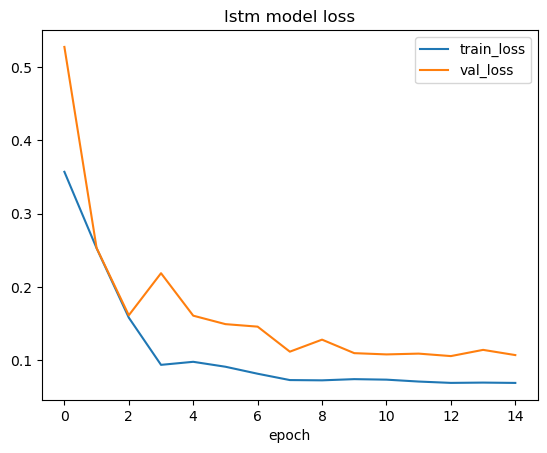

ValueError: determine_best_by must be one of ['TestSetRMSE', 'TestSetMAPE', 'TestSetMAE', 'TestSetR2', 'InSampleRMSE', 'InSampleMAPE', 'InSampleMAE', 'InSampleR2', 'ValidationMetricValue'], got LevelTestSetMAPE.

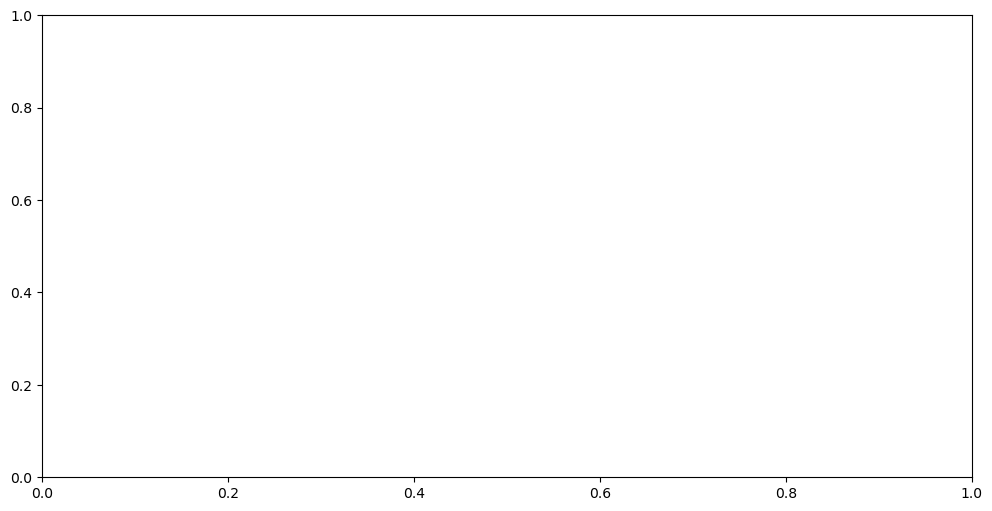

In [ ]:
f.manual_forecast(
    call_me='lstm_best',
    lags=36,
    batch_size=32,
    epochs=15,
    validation_split=.2,
    shuffle=True,
    activation='tanh',
    optimizer='Adam',
    learning_rate=0.001,
    lstm_layer_sizes=(72,)*4,
    dropout=(0,)*4,
    plot_loss=True
)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import and show dataset
data = pd.read_csv("D:/deep_learning/AirPassengers.csv")
print("Shape of Data: ", data.shape)
data.head()

Shape of Data:  (144, 2)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<Axes: >

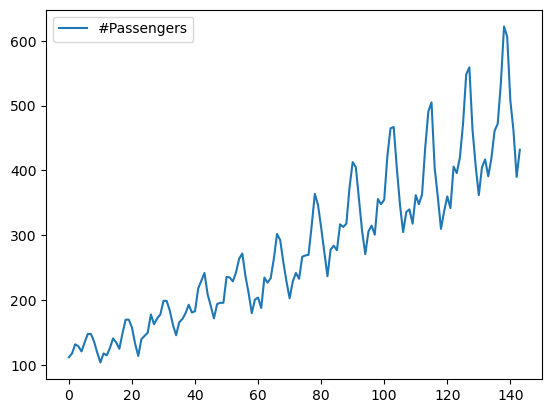

In [ ]:
# Plot data
data.plot()

In [ ]:
# Information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
# Create a dataframe with only the number of passengers
df=data.filter(['#Passengers'])
# Convert the dataframe to a numpy array
df=df.values
print(data[:5])

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [ ]:
# Scale the data to make it applicable for RNN
scaler=MinMaxScaler(feature_range=(0,1))
df_scaled=scaler.fit_transform(df)
df_scaled[:5]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]])

In [ ]:

# Split data into predictors and outcomes
# predict the number of passengers using by the past 6 months' number of passengers
X=[]
y=[]
sequence=6
for i in range(len(df_scaled) - sequence):
    X.append(df_scaled[i:(i + sequence),0])
    y.append(df_scaled[i + sequence,0])
X,y=np.array(X),np.array(y)
print(X)
print(y)

[[0.01544402 0.02702703 0.05405405 0.04826255 0.03281853 0.05984556]
 [0.02702703 0.05405405 0.04826255 0.03281853 0.05984556 0.08494208]
 [0.05405405 0.04826255 0.03281853 0.05984556 0.08494208 0.08494208]
 [0.04826255 0.03281853 0.05984556 0.08494208 0.08494208 0.06177606]
 [0.03281853 0.05984556 0.08494208 0.08494208 0.06177606 0.02895753]
 [0.05984556 0.08494208 0.08494208 0.06177606 0.02895753 0.        ]
 [0.08494208 0.08494208 0.06177606 0.02895753 0.         0.02702703]
 [0.08494208 0.06177606 0.02895753 0.         0.02702703 0.02123552]
 [0.06177606 0.02895753 0.         0.02702703 0.02123552 0.04247104]
 [0.02895753 0.         0.02702703 0.02123552 0.04247104 0.07142857]
 [0.         0.02702703 0.02123552 0.04247104 0.07142857 0.05984556]
 [0.02702703 0.02123552 0.04247104 0.07142857 0.05984556 0.04054054]
 [0.02123552 0.04247104 0.07142857 0.05984556 0.04054054 0.08687259]
 [0.04247104 0.07142857 0.05984556 0.04054054 0.08687259 0.12741313]
 [0.07142857 0.05984556 0.04054054

In [ ]:
# Reshape the predictor
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
X.shape

(138, 6, 1)

In [ ]:
# Split data into training and test sets

# Set the size of training and test data
# Use 75% of the data for training
train_size = math.ceil(len(X) * 0.75)
test_size = len(X - train_size)

# Split X and y into training and test sets
X_train = X[:train_size, :]
y_train = y[:train_size]

X_test = X[train_size:len(X),:]
y_test = y[train_size:len(y)]


In [ ]:
# Show the size of training and test sets
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test : ", X_test.shape)
print("y_test : ", y_test.shape)

X_train:  (104, 6, 1)
y_train:  (104,)
X_test :  (34, 6, 1)
y_test :  (34,)


In [ ]:
# Build LSTM model
lstm=Sequential()
lstm.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm.add(LSTM(units=32, return_sequences=True))
lstm.add(LSTM(units=32, return_sequences=True))
lstm.add(LSTM(units=32))
lstm.add(Dense(units=1))
lstm.compile(optimizer='adam', loss='mean_squared_error')
lstm.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 6, 32)             4352      
                                                                 
 lstm_21 (LSTM)              (None, 6, 32)             8320      
                                                                 
 lstm_22 (LSTM)              (None, 6, 32)             8320      
                                                                 
 lstm_23 (LSTM)              (None, 32)                8320      
                                                                 
 dense_31 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_history = lstm.fit(X_train, y_train,
                        batch_size=16,
                        epochs=100,
                        validation_split=0.2,
                        callbacks=[early_stop],
                        verbose=1)

Epoch 1/100
6/6 [==============================] - 0s 44ms/step - loss: 0.0051 - val_loss: 0.0226
Epoch 2/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0048 - val_loss: 0.0271
Epoch 3/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0050 - val_loss: 0.0247
Epoch 4/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0048 - val_loss: 0.0295
Epoch 5/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0049 - val_loss: 0.0253
Epoch 6/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0049 - val_loss: 0.0198
Epoch 7/100
6/6 [==============================] - 0s 33ms/step - loss: 0.0055 - val_loss: 0.0217
Epoch 8/100
6/6 [==============================] - 0s 37ms/step - loss: 0.0060 - val_loss: 0.0355
Epoch 9/100
6/6 [==============================] - 0s 39ms/step - loss: 0.0051 - val_loss: 0.0211
Epoch 10/100
6/6 [==============================] - 0s 31ms/step - loss: 0.0055 - val_loss: 0.0227
Epoch 11/100
6/6 [=

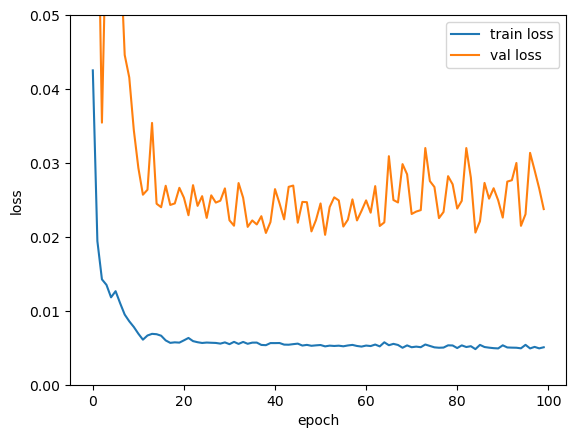

In [ ]:
# Plot the learning history
plt.plot(lstm_history.history['loss'], label='train loss')
plt.plot(lstm_history.history['val_loss'], label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.ylim([0,0.05])
plt.show()

In [ ]:

# Build GRU model
gru=Sequential()
gru.add(GRU(units=32, return_sequences=True, input_shape=(X_train.shape[1],X_train.shape[2])))
gru.add(GRU(units=32, return_sequences=True))
gru.add(GRU(units=32, return_sequences=True))
gru.add(GRU(units=32))
gru.add(Dense(units=1))
gru.compile(optimizer='adam', loss='mean_squared_error')
gru.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 6, 32)             3360      
                                                                 
 gru_6 (GRU)                 (None, 6, 32)             6336      
                                                                 
 gru_7 (GRU)                 (None, 6, 32)             6336      
                                                                 
 gru_8 (GRU)                 (None, 32)                6336      
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Set Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=40)

In [ ]:
gru_history =gru.fit(X_train, y_train,batch_size=16,epochs=100,validation_split=0.2,callbacks=[early_stop],verbose=1)

Epoch 1/100
6/6 [==============================] - 15s 453ms/step - loss: 0.0359 - val_loss: 0.0804
Epoch 2/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0099 - val_loss: 0.0271
Epoch 3/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0099 - val_loss: 0.0551
Epoch 4/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0084 - val_loss: 0.0499
Epoch 5/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0069 - val_loss: 0.0243
Epoch 6/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0071 - val_loss: 0.0220
Epoch 7/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0057 - val_loss: 0.0292
Epoch 8/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0055 - val_loss: 0.0200
Epoch 9/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0050 - val_loss: 0.0214
Epoch 10/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0048 - val_loss: 0.0191
Epoch 11/100
6/6 

In [ ]:
# Predict with LSTM model
lstm_y_pred=lstm.predict(X_test)
lstm_y_pred=scaler.inverse_transform(lstm_y_pred)
# Predict with GRU model
gru_y_pred=gru.predict(X_test)
gru_y_pred=scaler.inverse_transform(gru_y_pred)

2/2 [==============================] - 3s 7ms/step


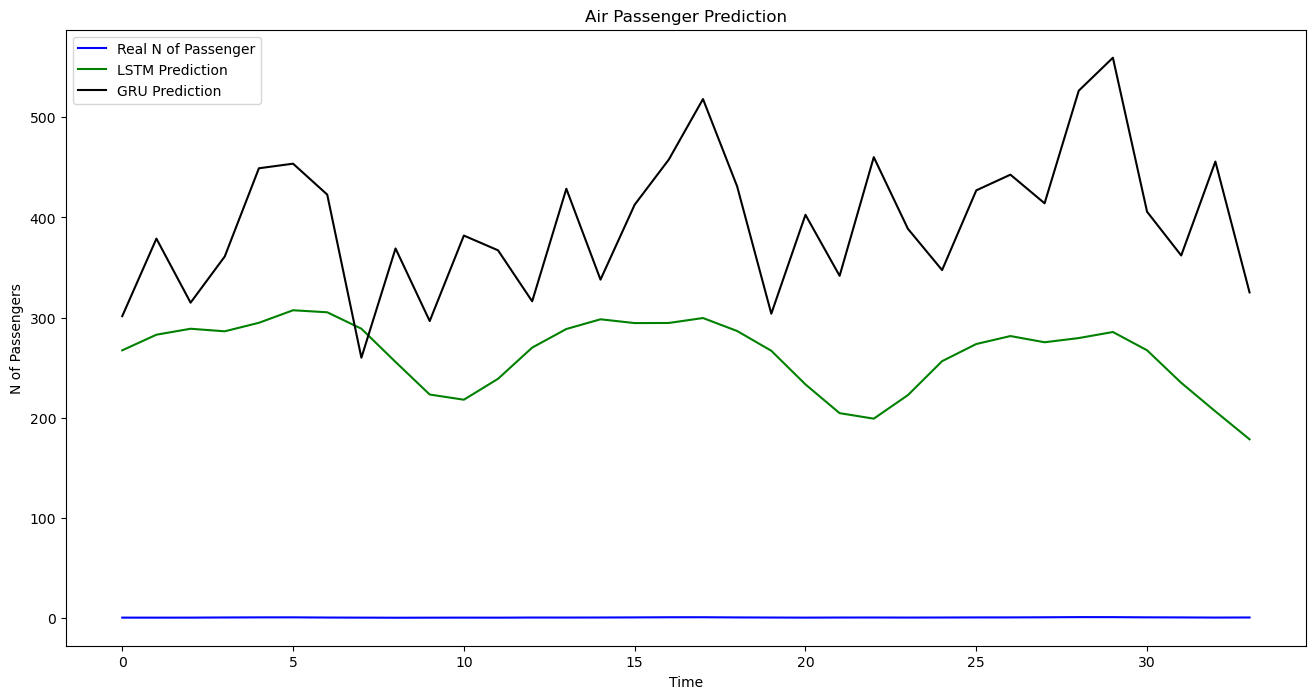

In [ ]:
# Visualize the results
plt.figure(figsize=(16,8))
plt.plot(y_test, color='blue',label='Real N of Passenger')
plt.plot(lstm_y_pred, color='green', label='LSTM Prediction')
plt.plot(gru_y_pred, color='black', label='GRU Prediction')
plt.title('Air Passenger Prediction')
plt.xlabel('Time')
plt.ylabel('N of Passengers')
plt.legend()
plt.show()

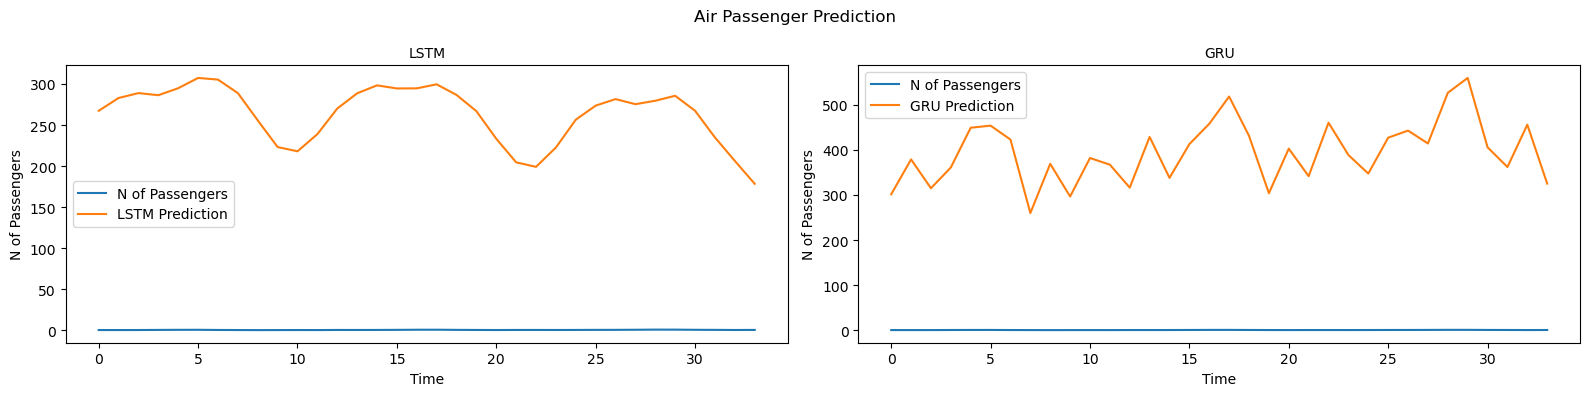

In [ ]:
# Set subplot subttitles
titles = ['LSTM', 'GRU']

# Create a list of prediction models
models = [lstm_y_pred, gru_y_pred]

# Set the plot area
fig, ax = plt.subplots(1, 2, figsize=(16,4), tight_layout=True)

# Set the title
plt.suptitle('Air Passenger Prediction')

# Create and show subplots
for i in range(0, 2):
    plt.subplot(1, 2,i+1)
    plt.title(titles[i], fontsize=10)
    plt.plot(y_test, label='N of Passengers')
    plt.plot(models[i], label=titles[i]+' Prediction')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('N of Passengers')

In [ ]:
#4)chose a dataset and apply autoencoder i)deep learning  ii)convolutional  iii)stack encoder
#i)deep learning
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
#Load our MNIST dataset.
(XTrain, YTrain), (XTest, YTest) = mnist.load_data()

print('XTrain class = ',type(XTrain))
print('YTrain class = ',type(YTrain))

# shape of our dataset.
print('XTrain shape = ',XTrain.shape)
print('XTest shape = ',XTest.shape)
print('YTrain shape = ',YTrain.shape)
print('YTest shape = ',YTest.shape)
# Number of distinct values of our MNIST target
print('YTrain values = ',np.unique(YTrain))
print('YTest values = ',np.unique(YTest))
# Distribution of classes in our dataset.
unique, counts = np.unique(YTrain, return_counts=True)
print('YTrain distribution = ',dict(zip(unique, counts)))
unique, counts = np.unique(YTest, return_counts=True)
print('YTest distribution = ',dict(zip(unique, counts)))

XTrain class =  <class 'numpy.ndarray'>
YTrain class =  <class 'numpy.ndarray'>
XTrain shape =  (60000, 28, 28)
XTest shape =  (10000, 28, 28)
YTrain shape =  (60000,)
YTest shape =  (10000,)
YTrain values =  [0 1 2 3 4 5 6 7 8 9]
YTest values =  [0 1 2 3 4 5 6 7 8 9]
YTrain distribution =  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
YTest distribution =  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


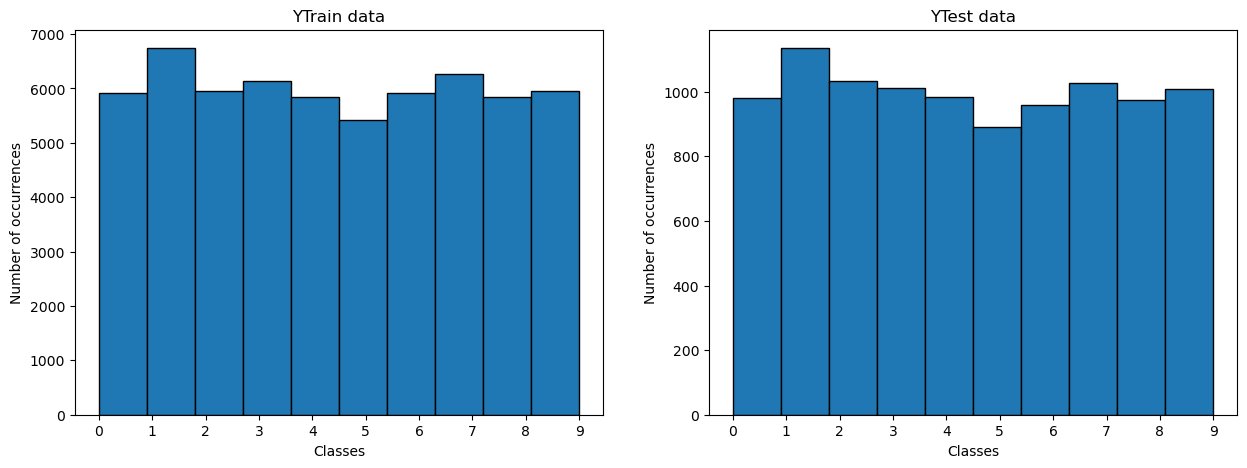

In [ ]:
# we plot an histogram distribution of our test and train data.
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].hist(YTrain, ec='black')
axs[0].set_title('YTrain data')
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Number of occurrences')
axs[1].hist(YTest, ec='black')
axs[1].set_title('YTest data')
axs[1].set_xlabel('Classes')
axs[1].set_ylabel('Number of occurrences')
# We want to show all ticks...
axs[0].set_xticks(np.arange(10))
axs[1].set_xticks(np.arange(10))

plt.show()

In [ ]:
# Data normalization.
XTrain = XTrain.astype('float32') / 255
XTest = XTest.astype('float32') / 255
# data reshapping.
XTrain = XTrain.reshape((len(XTrain), np.prod(XTrain.shape[1:])))
XTest = XTest.reshape((len(XTest), np.prod(XTest.shape[1:])))

print (XTrain.shape)
print (XTest.shape)

(60000, 784)
(10000, 784)


In [ ]:
InputModel = Input(shape=(784,))
EncodedLayer = Dense(32, activation='relu')(InputModel)
DecodedLayer = Dense(784, activation='sigmoid')(EncodedLayer)

AutoencoderModel = Model(InputModel, DecodedLayer)
# we can summarize our model.
AutoencoderModel.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_36 (Dense)            (None, 32)                25120     
                                                                 
 dense_37 (Dense)            (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
AutoencoderModel.compile(optimizer='adadelta', loss='binary_crossentropy')

history = AutoencoderModel.fit(XTrain, XTrain,
                    batch_size=256,
                    epochs=100,
                    shuffle=True,
                    validation_data=(XTest, XTest))
# Make prediction to decode the digits
DecodedDigits = AutoencoderModel.predict(XTest)

Epoch 1/100
235/235 [==============================] - 5s 16ms/step - loss: 0.6941 - val_loss: 0.6940
Epoch 2/100
235/235 [==============================] - 3s 13ms/step - loss: 0.6939 - val_loss: 0.6938
Epoch 3/100
235/235 [==============================] - 2s 10ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 4/100
235/235 [==============================] - 2s 10ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 5/100
235/235 [==============================] - 2s 10ms/step - loss: 0.6935 - val_loss: 0.6934
Epoch 6/100
235/235 [==============================] - 2s 10ms/step - loss: 0.6933 - val_loss: 0.6933
Epoch 7/100
235/235 [==============================] - 2s 10ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 8/100
235/235 [==============================] - 2s 10ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 9/100
235/235 [==============================] - 2s 10ms/step - loss: 0.6929 - val_loss: 0.6928
Epoch 10/100
235/235 [==============================] - 2s 10ms/step - loss: 0.692

dict_keys(['loss', 'val_loss'])


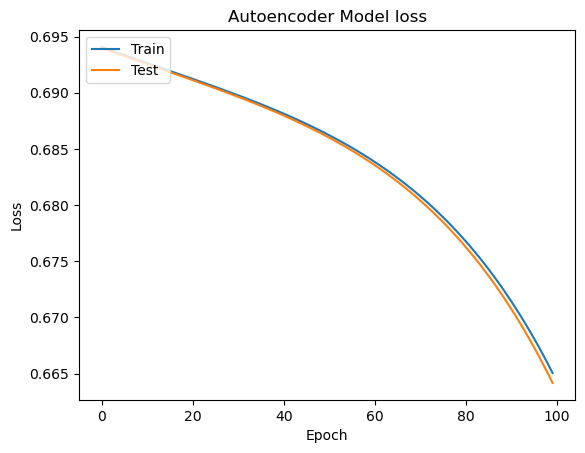

In [ ]:
def plotmodelhistory(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Autoencoder Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())
# visualization of the loss minimization during the training process
plotmodelhistory(history)

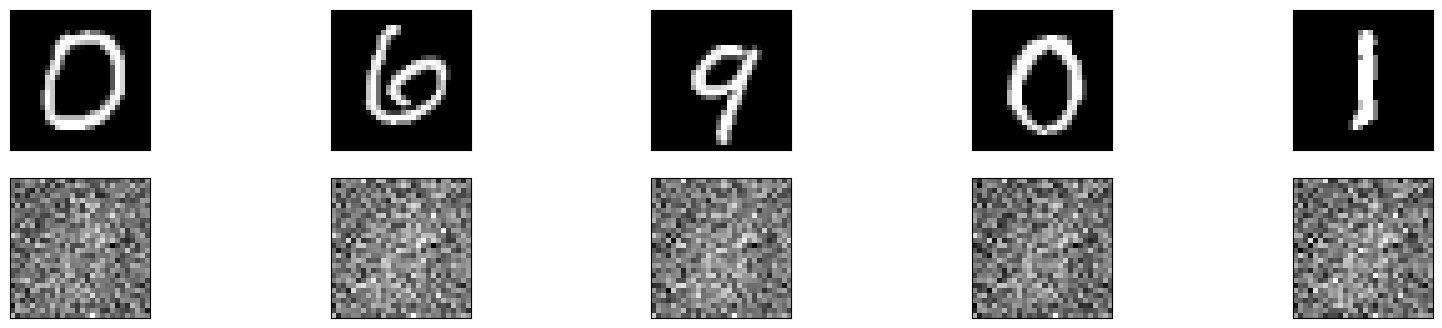

In [ ]:
n=5
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    # input image
    plt.imshow(XTest[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    # Image decoded by our Auto-encoder
    plt.imshow(DecodedDigits[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#ii)CNN
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    inpx = (1, img_rows, img_cols)

else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    inpx = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255


In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


In [ ]:
inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)


In [ ]:
model = Model([inpx], layer7)
model.compile(optimizer=keras.optimizers.Adadelta(),
			loss=keras.losses.categorical_crossentropy,
			metrics=['accuracy'])

model.fit(x_train, y_train, epochs=12, batch_size=500)


Epoch 1/12
120/120 [==============================] - 112s 919ms/step - loss: 2.4250 - accuracy: 0.0993
Epoch 2/12
120/120 [==============================] - 108s 901ms/step - loss: 2.4140 - accuracy: 0.0993
Epoch 3/12
120/120 [==============================] - 106s 881ms/step - loss: 2.4033 - accuracy: 0.0993
Epoch 4/12
120/120 [==============================] - 108s 900ms/step - loss: 2.3928 - accuracy: 0.0993
Epoch 5/12
120/120 [==============================] - 106s 881ms/step - loss: 2.3824 - accuracy: 0.0993
Epoch 6/12
120/120 [==============================] - 105s 876ms/step - loss: 2.3723 - accuracy: 0.0993
Epoch 7/12
120/120 [==============================] - 103s 857ms/step - loss: 2.3628 - accuracy: 0.0993
Epoch 8/12
120/120 [==============================] - 98s 816ms/step - loss: 2.3534 - accuracy: 0.0993
Epoch 9/12
120/120 [==============================] - 98s 815ms/step - loss: 2.3443 - accuracy: 0.0993
Epoch 10/12
120/120 [==============================] - 105s 872ms/

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])


loss= 2.3118114471435547
accuracy= 0.10320000350475311


In [ ]:
#iii)stacked encoder
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import imshow
from sklearn.manifold import TSNE

In [ ]:
#Download Data
digitMNIST = pd.read_csv("D:/deep_learning/mnist_train.csv")
test_set, val_set = digitMNIST[5000:], digitMNIST[:5000]
val_set.shape

(5000, 785)

In [ ]:
ylabels, xPics = test_set['label'], test_set.drop('label', axis=1)
yVal_labels, xVal_Pics = val_set['label'], val_set.drop('label', axis=1)
#Normalising
xPics = xPics/255
xVal_Pics = xVal_Pics/255
#Reshaping
xPics = tf.reshape(xPics.values,[-1,28,28])
xVal_Pics = tf.reshape(xVal_Pics.values,[-1, 28, 28])

In [ ]:
#Autoencoder topology
Stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(100,activation="selu"),
    keras.layers.Dense(30,activation="selu"),
])

Stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100,activation="selu",input_shape=[30]),
    keras.layers.Dense(28*28, activation="sigmoid"),
    keras.layers.Reshape([28,28])
])
stacked_ae = keras.models.Sequential([Stacked_encoder,Stacked_decoder])
#Build model
stacked_ae.compile(loss="binary_crossentropy",optimizer=keras.optimizers.SGD(lr=1.5))

In [ ]:
#Train model
history= stacked_ae.fit(xPics,xPics,epochs=30,validation_data=(xVal_Pics,xVal_Pics), verbose=0)